<a href="https://colab.research.google.com/github/lailamt/MATA53-best-first-search/blob/main/MATA53_Best_First_Search_Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Código certo!


```
# Implementação da função BFS
```

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

Função que adiciona os vértices ao grafo

In [2]:
# addedge vincula um vértice ao outro e guarda o valor de custo
def addedge(x, y, cost):
  grafo[x].append((y, cost))

  G.add_nodes_from([x,y])
  G.add_edge(x,y)
  
  edges.append((x,y))
# deve inserir os dados de (v_partida,v_chegada,custo_caminho)

Função de ordenação da Lista de Tuplas

In [3]:
# Ordena de acordo com o valor de custo da Tupla (y,custo)
def Sort_Tuple(tup): 
      
    # pega o tamanho da lista de tuplas
    lst = len(tup) 
    for i in range(0, lst): 
          
        for j in range(0, lst-i-1): 
            if (tup[j][1] > tup[j + 1][1]): 
                temp = tup[j] 
                tup[j]= tup[j + 1] 
                tup[j + 1]= temp 
    return tup 

Best First Search Dumb

In [4]:
# recebe dois valores como parâmetro
# start = vértice_saída
# end = vértice_chegada
def best_first_search(start, end):
  visitado = []
  visitar = []
  total_custo = 0

  visitado.append(start)

  for x in grafo[start]:
    visitar.append(x)
  
  Sort_Tuple(visitar)
  visitado.append(visitar[0][0])

  while visitar[0][0] != end:
    total_custo += visitar[0][1]
    for x in grafo[visitar[0][0]]:
      visitar.append(x)
    visitar.pop(0)
    Sort_Tuple(visitar)
    visitado.append(visitar[0][0])

  total_custo+=visitar[0][1] 
  visitado.append(total_custo)
  return visitado

In [5]:
# recebe uma tupla como parâmetro
# caminho = (vértice_saída, vértice_chegada)
def best_first_search2(caminho):
  visitado = []
  visitar = []
  total_custo = 0

  visitar.append((caminho[0],total_custo))
  #print(visitar)
  
  if visitar[0][0] == caminho[1]:
    #visitado.append(visitar[0][0])
    visitado.append(total_custo)
    print("O vértice de saída é igual ao vértice de entrada.")
  else:
    while visitar[0][0] != caminho[1]:
      visitado.append(visitar[0][0])
      total_custo += visitar[0][1]
      for x in grafo[visitar[0][0]]:
        visitar.append(x)
      visitar.pop(0)
      Sort_Tuple(visitar)

    visitado.append(visitar[0][0])
    total_custo+=visitar[0][1] 
    visitado.append(total_custo)
  return visitado

In [76]:
def calc_path_edges():
  path_edges=[]
  for x in range(len(caminho_do_grafo)):
    for y in range(len(edges)):
      if ((caminho_do_grafo[x] == edges[y][1]) and (edges[y][0] in caminho_do_grafo)):
        path_edges.append(edges[y])
  return path_edges

In [74]:
def draw_graph():
  pos = nx.spring_layout(G)

  path_edges = calc_path_edges()

  # Draw nodes and edges not included in path
  nx.draw_networkx_nodes(G, pos, nodelist=set(G.nodes)-set(caminho_do_grafo))
  nx.draw_networkx_edges(G, pos, edgelist=set(G.edges)-set(path_edges), connectionstyle='arc3, rad = 0.3')
  # Draw nodes and edges included in path
  nx.draw_networkx_nodes(G, pos, nodelist=caminho_do_grafo, node_color='r')
  nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='r', connectionstyle='arc3, rad = 0.3')

  # Draw labels
  nx.draw_networkx_labels(G,pos)

  #plt.savefig("simple_path.png") # save as png
  plt.show() # display

Teste 1

```
Saída esperada: 
Caminho = [0, 1, 3, 2, 8, 9]
Custo = 26
```

Inicialização

In [36]:
# v é a quantidade de vértices em G
# DEVE SER INSERIDO
v = 14
# grafo é uma lista de listas de tamanho v
grafo = [[] for i in range(v)]

G=nx.Graph()
edges = []

Cria o grafo adicionando os vértices

In [37]:
addedge(0, 1, 3)
addedge(0, 2, 6)
addedge(0, 3, 5)
addedge(1, 4, 9)
addedge(1, 5, 8)
addedge(2, 6, 12)
addedge(2, 7, 14)
addedge(3, 8, 7)
addedge(8, 9, 5)
addedge(8, 10, 6)
addedge(9, 11, 1)
addedge(9, 12, 10)
addedge(9, 13, 2)

In [38]:
caminho_do_grafo = best_first_search(0, 9)

In [39]:
custo_total = caminho_do_grafo.pop(-1)
custo_total

26

In [40]:
caminho_do_grafo

[0, 1, 3, 2, 8, 9]

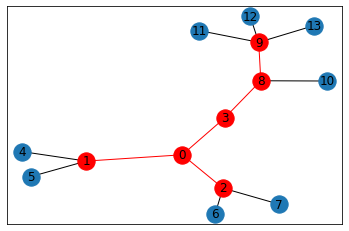

In [41]:
draw_graph()

Teste 2

```
Saída esperada: 
Caminho = []
Custo = 0
```

Inicialização

In [65]:
# v é a quantidade de vértices em G
# DEVE SER INSERIDO
v = 12
# grafo é uma lista de listas de tamanho v
grafo = [[] for i in range(v)]

G=nx.Graph()
edges = []

Cria o grafo adicionando os vértices

In [66]:
addedge(0, 1, 7)
addedge(0, 2, 2)
addedge(0, 3, 3)
addedge(1, 2, 3)
addedge(1, 4, 4)
addedge(2, 4, 4)
addedge(2, 5, 1)
addedge(3, 6, 2)
addedge(4, 7, 5)
addedge(5, 7, 3)
addedge(5, 8, 2)
addedge(6, 9, 4)
addedge(6, 10, 4)
addedge(8, 12, 2)
addedge(9, 11, 4)
addedge(10, 11, 4)
addedge(11, 12, 5)

In [67]:
caminho_do_grafo = best_first_search2((0,12))

In [68]:
custo_total = caminho_do_grafo.pop(-1)
custo_total

7

In [69]:
caminho_do_grafo

[0, 2, 5, 8, 12]

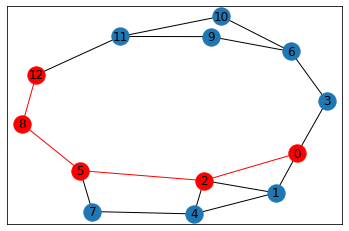

[(0, 2), (2, 5), (5, 8), (8, 12)]


In [77]:
draw_graph()